# Importing Libraries


In [60]:
# 1 Core Libraries (Data Handling)
import numpy as np
import pandas as pd
# 2. Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# 3. Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 4. Encoding Categorical Data
from sklearn.preprocessing import OneHotEncoder
# 5. Supervised Learning Models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
# 6. Unsupervised Learning Models
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
# 7. Dimensionality Reduction (PCA)
from sklearn.decomposition import PCA
#8. Model Evaluation Metrics
from sklearn.metrics import r2_score, mean_squared_error
# 9. Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV


# Data Cleaning & Basic Visualization

### Loading Dataset

In [61]:
df = pd.read_csv("zipcodesCA2.csv")
df

,zip,eiaid,utility_name,state,service_type,ownership,comm_rate,ind_rate,res_rate
0,85321,176,Ajo Improvement Co,AZ,Bundled,Investor Owned,0.087890,0.000000,0.093887
1,36560,195,Alabama Power Co,AL,Bundled,Investor Owned,0.121895,0.063652,0.135057
2,36513,195,Alabama Power Co,AL,Bundled,Investor Owned,0.121895,0.063652,0.135057
3,36280,195,Alabama Power Co,AL,Bundled,Investor Owned,0.121895,0.063652,0.135057
4,35473,195,Alabama Power Co,AL,Bundled,Investor Owned,0.121895,0.063652,0.135057
...,...,...,...,...,...,...,...,...,...
52172,96146,57483,Liberty Utilities,CA,Bundled,Investor Owned,0.146224,0.000000,0.140019
52173,96161,57483,Liberty Utilities,CA,Bundled,Investor Owned,0.146224,0.000000,0.140019
52174,96133,57483,Liberty Utilities,CA,Bundled,Investor Owned,0.146224,0.000000,0.140019
52175,96118,57483,Liberty Utilities,CA,Bundled,Investor Owned,0.146224,0.000000,0.140019


In [62]:
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52177 entries, 0 to 52176
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   zip           52177 non-null  int64  
 1   eiaid         52177 non-null  int64  
 2   utility_name  52177 non-null  object 
 3   state         52177 non-null  object 
 4   service_type  52177 non-null  object 
 5   ownership     52177 non-null  object 
 6   comm_rate     52177 non-null  float64
 7   ind_rate      52177 non-null  float64
 8   res_rate      52177 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 3.6+ MB


### Check Missing Values

In [63]:
df.isnull().sum()
df = df.dropna(subset=['res_rate'])


### Remove Duplicates


In [64]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)


###  Outlier Treatment (IQR Method)

In [65]:
Q1 = df['res_rate'].quantile(0.25)
Q3 = df['res_rate'].quantile(0.75)
IQR = Q3 - Q1

df = df[
    (df['res_rate'] >= Q1 - 1.5 * IQR) &
    (df['res_rate'] <= Q3 + 1.5 * IQR)
]


# Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)


In [70]:
from sklearn.metrics import r2_score, mean_squared_error

lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

lr_r2, lr_mse


(0.8922845888320649, 0.0001257664224354749)

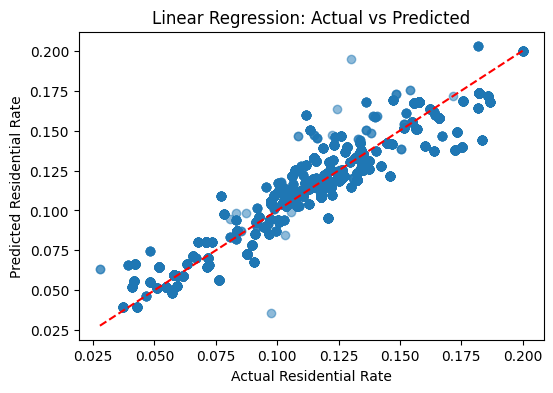

In [71]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.xlabel("Actual Residential Rate")
plt.ylabel("Predicted Residential Rate")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.show()


# Logistic Regression

In [72]:
df['rate_category'] = np.where(
    df['res_rate'] > df['res_rate'].median(),
    1, 0
)


In [73]:
y_class = df['rate_category']


In [74]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_scaled,
    y_class,
    test_size=0.2,
    random_state=42
)


In [75]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(Xc_train, yc_train)

log_pred = log_model.predict(Xc_test)


In [76]:
from sklearn.metrics import accuracy_score, classification_report

log_acc = accuracy_score(yc_test, log_pred)
log_acc


0.927705580430272

In [77]:
print(classification_report(yc_test, log_pred))


              precision    recall  f1-score   support

           0       0.95      0.90      0.93      4586
           1       0.91      0.95      0.93      4571

    accuracy                           0.93      9157
   macro avg       0.93      0.93      0.93      9157
weighted avg       0.93      0.93      0.93      9157



### Basic Visualization

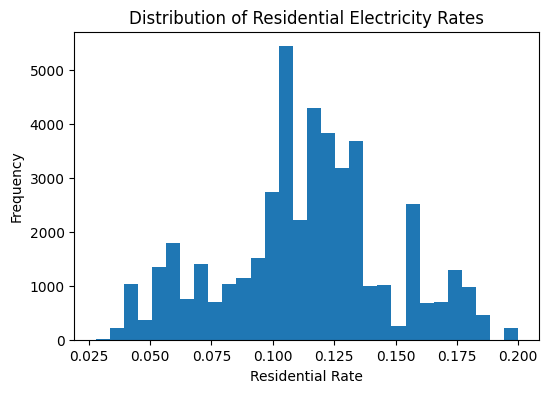

In [66]:
plt.figure(figsize=(6,4))
plt.hist(df['res_rate'], bins=30)
plt.xlabel("Residential Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Residential Electricity Rates")
plt.show()


### Boxplot (Before Modeling)

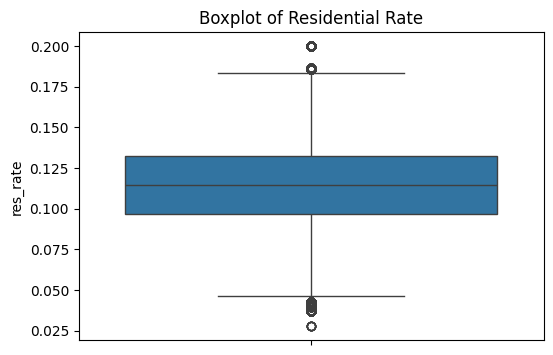

In [67]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['res_rate'])
plt.title("Boxplot of Residential Rate")
plt.show()


### Cleaned Dataset Summary

In [19]:
df.describe()


,zip,eiaid,comm_rate,ind_rate,res_rate
count,45783.000000,45783.000000,45783.000000,45783.000000,45783.000000
mean,41211.949370,13928.233165,0.087625,0.059144,0.113785
std,27528.030357,11532.529738,0.033446,0.032206,0.033949
min,1002.000000,176.000000,0.014367,0.000000,0.027778
25%,16724.000000,6452.000000,0.071762,0.042962,0.097005
50%,36855.000000,13756.000000,0.091820,0.062603,0.114903
75%,61448.500000,15473.000000,0.108253,0.076550,0.132438
max,99841.000000,57483.000000,0.180336,0.360000,0.200012


# Exploratory Data Analysis (EDA) & Statistical Analysis

In [20]:
eda_cols = ['res_rate', 'comm_rate', 'ind_rate']
df[eda_cols].describe()


,res_rate,comm_rate,ind_rate
count,45783.000000,45783.000000,45783.000000
mean,0.113785,0.087625,0.059144
std,0.033949,0.033446,0.032206
min,0.027778,0.014367,0.000000
25%,0.097005,0.071762,0.042962
50%,0.114903,0.091820,0.062603
75%,0.132438,0.108253,0.076550
max,0.200012,0.180336,0.360000


### Correlation Analysis

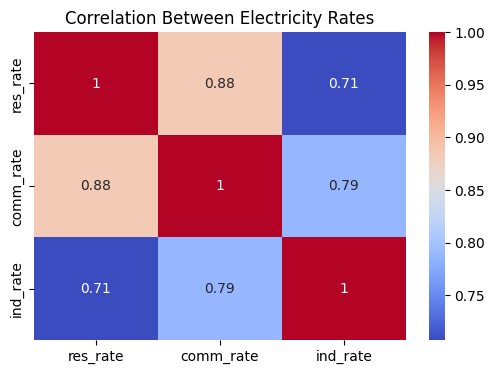

In [68]:
plt.figure(figsize=(6,4))
sns.heatmap(df[eda_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Electricity Rates")
plt.show()


### Ownership vs Residential Rate

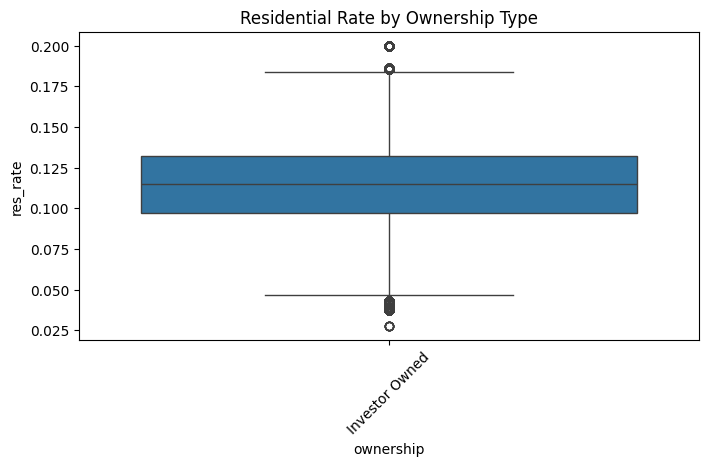

In [22]:
plt.figure(figsize=(8,4))
sns.boxplot(x='ownership', y='res_rate', data=df)
plt.xticks(rotation=45)
plt.title("Residential Rate by Ownership Type")
plt.show()


### Service Type vs Residential Rate

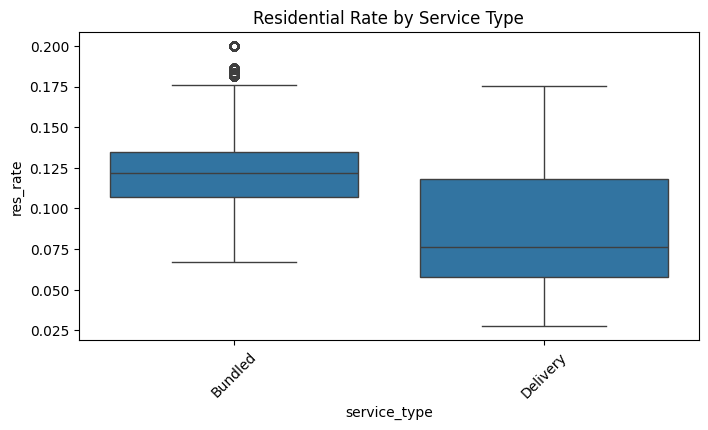

In [23]:
plt.figure(figsize=(8,4))
sns.boxplot(x='service_type', y='res_rate', data=df)
plt.xticks(rotation=45)
plt.title("Residential Rate by Service Type")
plt.show()


### State-wise Trend

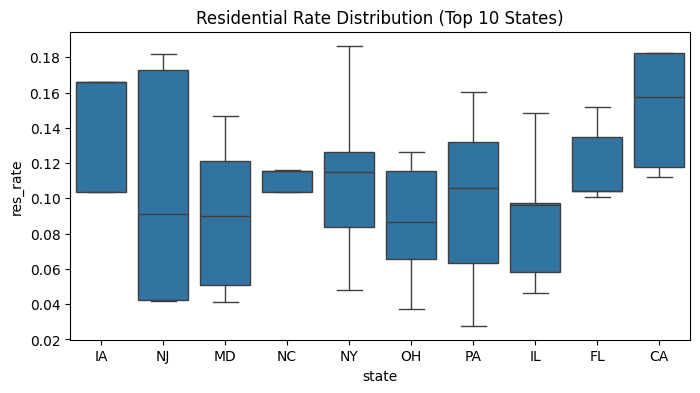

In [24]:
top_states = df['state'].value_counts().head(10).index

plt.figure(figsize=(8,4))
sns.boxplot(x='state', y='res_rate', data=df[df['state'].isin(top_states)])
plt.title("Residential Rate Distribution (Top 10 States)")
plt.show()


### Statistical Insight

In [25]:
df.groupby('ownership')['res_rate'].var()


ownership
Investor Owned    0.001153
Name: res_rate, dtype: float64

# Feature Engineering & Data Preparation

In [26]:
y = df['res_rate']


In [27]:
X = df[['state', 'ownership', 'service_type', 'comm_rate', 'ind_rate']]


In [28]:
X_encoded = pd.get_dummies(X, drop_first=True)


In [29]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


In [30]:
# Train–Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42
)


In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((36626, 51), (9157, 51), (36626,), (9157,))

# Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor


In [33]:
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [34]:
rf_pred = rf_model.predict(X_test)


In [35]:
from sklearn.metrics import r2_score, mean_squared_error

rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

rf_r2, rf_mse


(0.9999983663424352, 1.9074268498627696e-09)

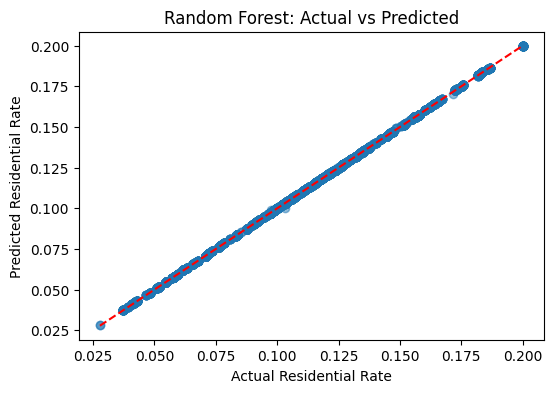

In [36]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.xlabel("Actual Residential Rate")
plt.ylabel("Predicted Residential Rate")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.show()


In [37]:
importances = rf_model.feature_importances_
feature_names = X_encoded.columns

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feat_imp.head(10)


,Feature,Importance
0,comm_rate,0.846825
1,ind_rate,0.054539
50,service_type_Delivery,0.024954
22,state_MI,0.012103
33,state_NY,0.010482
21,state_ME,0.006321
34,state_OH,0.005798
47,state_WI,0.005434
30,state_NJ,0.005366
8,state_DC,0.004443


# XGBoost Regression (Primary Model)

In [39]:
from xgboost import XGBRegressor


In [40]:
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


In [41]:
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [42]:
xgb_pred = xgb_model.predict(X_test)


In [43]:
from sklearn.metrics import r2_score, mean_squared_error

xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

xgb_r2, xgb_mse


(0.9990310287968318, 1.1313519610992854e-06)

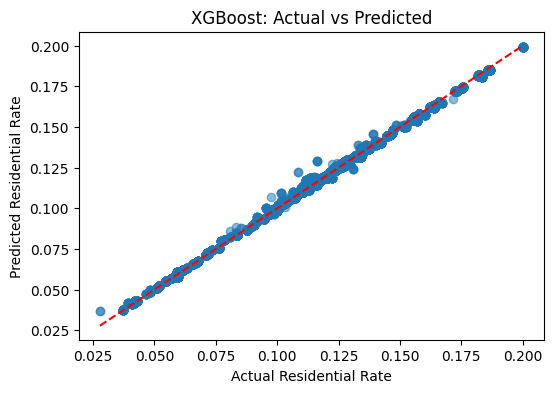

In [44]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, xgb_pred, alpha=0.5)
plt.xlabel("Actual Residential Rate")
plt.ylabel("Predicted Residential Rate")
plt.title("XGBoost: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.show()


In [45]:
xgb_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

xgb_importance.head(10)


,Feature,Importance
50,service_type_Delivery,0.149917
0,comm_rate,0.122636
22,state_MI,0.106963
34,state_OH,0.048194
30,state_NJ,0.046367
33,state_NY,0.043148
7,state_CT,0.038743
1,ind_rate,0.038364
21,state_ME,0.036952
8,state_DC,0.032277


# KMeans Clustering

In [46]:
X_cluster = X_scaled


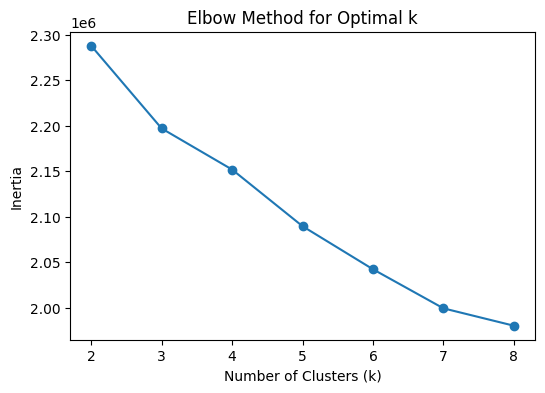

In [47]:
#Find Optimal Number of Clusters (Elbow Method)
from sklearn.cluster import KMeans

inertia = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2, 9), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


In [48]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_cluster)

df['KMeans_Cluster'] = clusters


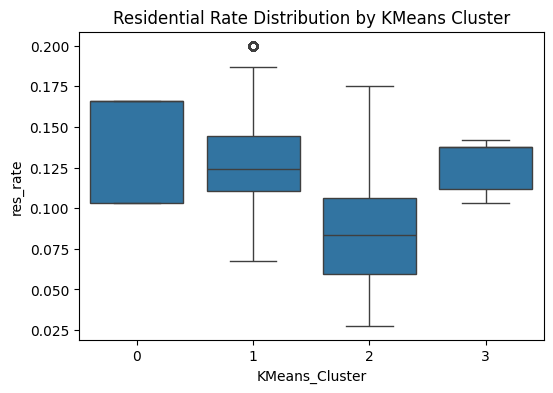

In [49]:
plt.figure(figsize=(6,4))
sns.boxplot(x='KMeans_Cluster', y='res_rate', data=df)
plt.title("Residential Rate Distribution by KMeans Cluster")
plt.show()


# Hierarchical Clustering

In [50]:
X_hier = X_scaled[:1000]   # sample for dendrogram


In [51]:
from scipy.cluster.hierarchy import linkage, dendrogram

linked = linkage(X_hier, method='ward')


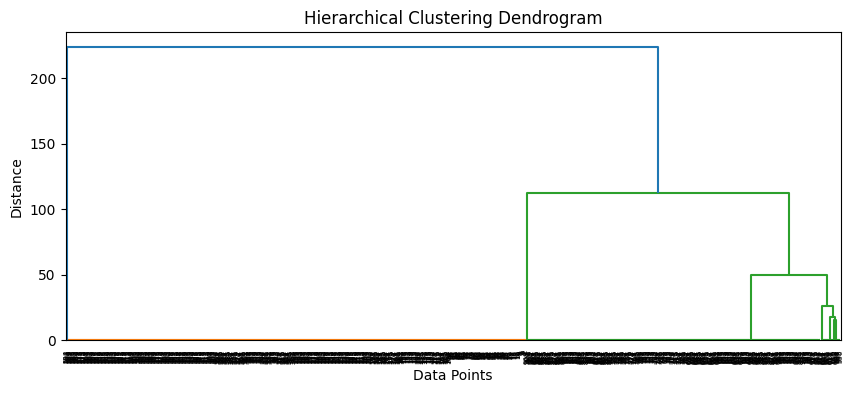

In [52]:
plt.figure(figsize=(10,4))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


# PCA (Principal Component Analysis)

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)


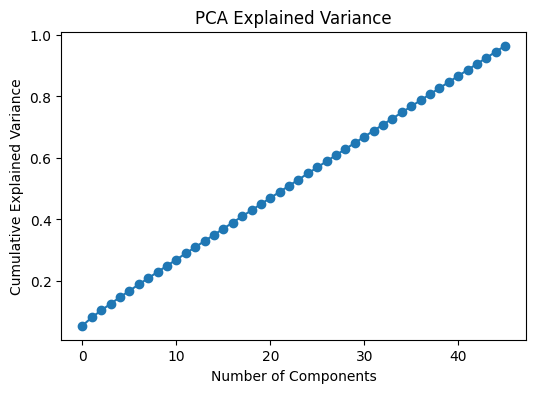

In [54]:
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()


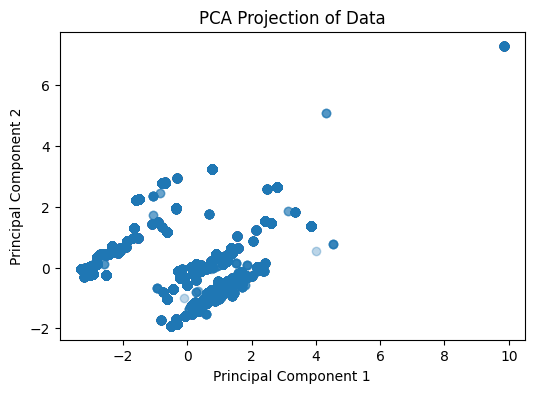

In [55]:
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Data")
plt.show()


In [56]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

xgb_pca = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

xgb_pca.fit(X_train_pca, y_train_pca)
xgb_pca_pred = xgb_pca.predict(X_test_pca)

r2_score(y_test_pca, xgb_pca_pred)


0.9997971101609824

 # Model Comparison & Evaluation

In [57]:
comparison = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'R2 Score': [rf_r2, xgb_r2],
    'MSE': [rf_mse, xgb_mse]
})

comparison


,Model,R2 Score,MSE
0,Random Forest,0.999998,1.907427e-09
1,XGBoost,0.999031,1.131352e-06


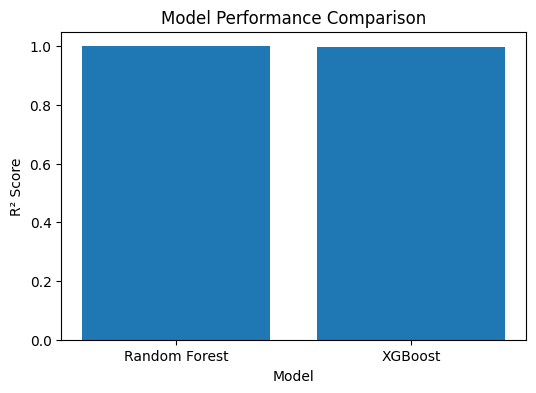

In [58]:
plt.figure(figsize=(6,4))
plt.bar(comparison['Model'], comparison['R2 Score'])
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("Model Performance Comparison")
plt.show()


# Pattern Explanation (Why One Model is Better)

In [59]:
rf_top = feat_imp.head(5)
xgb_top = xgb_importance.head(5)

rf_top, xgb_top


(                  Feature  Importance
 0               comm_rate    0.846825
 1                ind_rate    0.054539
 50  service_type_Delivery    0.024954
 22               state_MI    0.012103
 33               state_NY    0.010482,
                   Feature  Importance
 50  service_type_Delivery    0.149917
 0               comm_rate    0.122636
 22               state_MI    0.106963
 34               state_OH    0.048194
 30               state_NJ    0.046367)

# Comparing All the Models

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [79]:
accuracy_results = {}

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(Xc_train, yc_train)
accuracy_results["Logistic Regression"] = accuracy_score(
    yc_test, log_model.predict(Xc_test)
)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(Xc_train, yc_train)
accuracy_results["Decision Tree"] = accuracy_score(
    yc_test, dt.predict(Xc_test)
)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(Xc_train, yc_train)
accuracy_results["Random Forest"] = accuracy_score(
    yc_test, rf.predict(Xc_test)
)

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(Xc_train, yc_train)
accuracy_results["Gradient Boosting"] = accuracy_score(
    yc_test, gb.predict(Xc_test)
)

# Naive Bayes
nb = GaussianNB()
nb.fit(Xc_train, yc_train)
accuracy_results["Naive Bayes"] = accuracy_score(
    yc_test, nb.predict(Xc_test)
)

# XGBoost
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb.fit(Xc_train, yc_train)
accuracy_results["XGBoost"] = accuracy_score(
    yc_test, xgb.predict(Xc_test)
)


C:\Users\LENOVO L460\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:43:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [80]:
for model, acc in accuracy_results.items():
    print(f"{model}: {acc:.4f}")


Logistic Regression: 0.9277
Decision Tree: 1.0000
Random Forest: 1.0000
Gradient Boosting: 0.9782
Naive Bayes: 0.7912
XGBoost: 0.9998


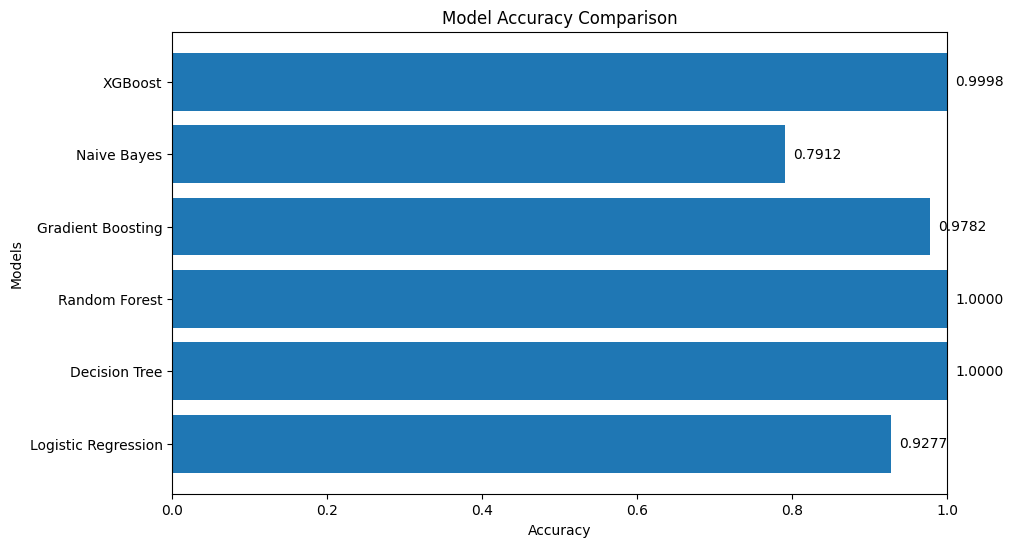

In [81]:
models = list(accuracy_results.keys())
accuracies = list(accuracy_results.values())

plt.figure(figsize=(10, 6))
bars = plt.barh(models, accuracies)
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)

# Add accuracy values on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f"{width:.4f}", va='center')

plt.show()
